In [118]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

In [119]:
model_results = pd.read_excel('pilots_random_forest_results.xlsx', index_col=0)
model_results.head(3)

,palm_file,model_name,learning_time,hyperparameters,"F1-Score, train","F1-Score, test",F1-Score: Neutral,F1-Score: Open,F1-Score: Pistol,F1-Score: Thumb,F1-Score: OK,F1-Score: Grab
0,2023-05-15_16-16-08.palm,RandomForestClassifier,9.69,"{'n_estimators': 125, 'max_depth': 20, 'min_sa...",0.947,0.987,0.992,0.980,0.983,0.971,0.984,0.979
1,2023-05-15_17-12-24.palm,RandomForestClassifier,90.39,"{'n_estimators': 150, 'max_depth': 20, 'min_sa...",0.827,0.966,0.975,0.983,0.945,0.915,0.938,0.958
2,2023-06-05_16-12-38.palm,RandomForestClassifier,8.59,"{'n_estimators': 125, 'max_depth': 20, 'min_sa...",0.929,0.983,0.987,0.985,0.977,0.972,0.976,0.974


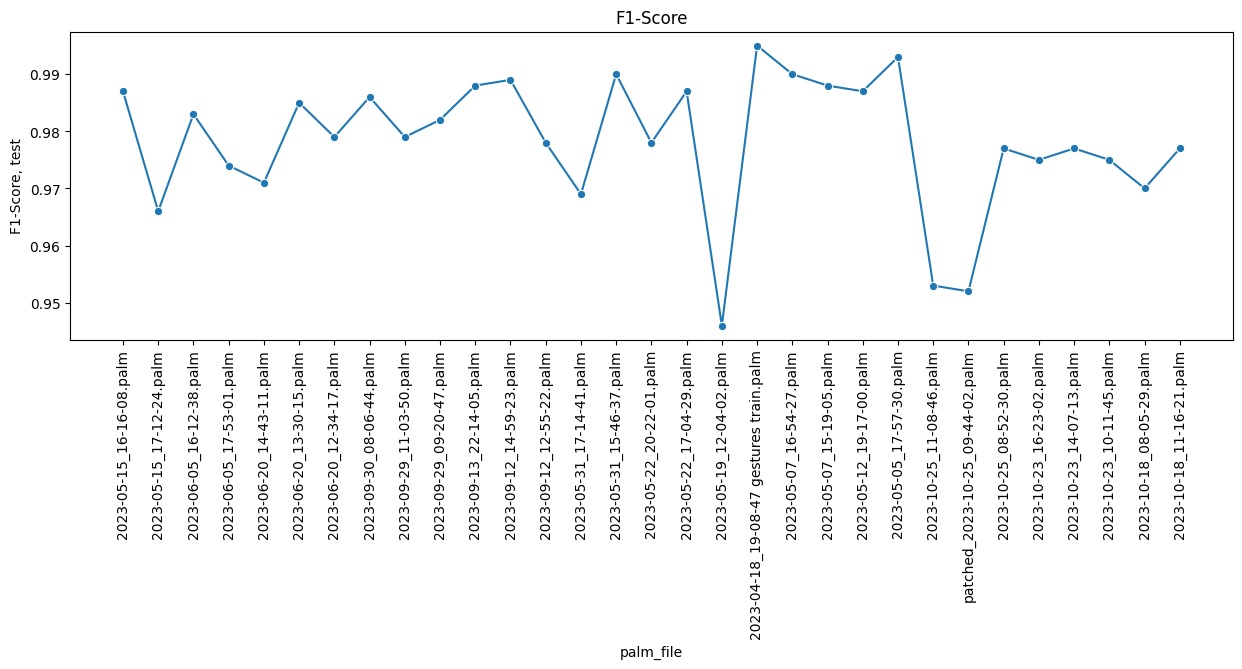

In [120]:
#set the canvas
plt.figure(figsize=(15, 4))

#plot the lineplot
sns.lineplot(data=model_results,
             x='palm_file',
             y='F1-Score, test',
             markers=True,
             dashes=False,
             marker='o'
             ).set(title='F1-Score')

plt.xticks(rotation=90);

In [121]:
#F1-Score
print(f"max: {model_results['F1-Score, test'].max()}, \n min: {model_results['F1-Score, test'].min()}")

max: 0.995, 
 min: 0.946


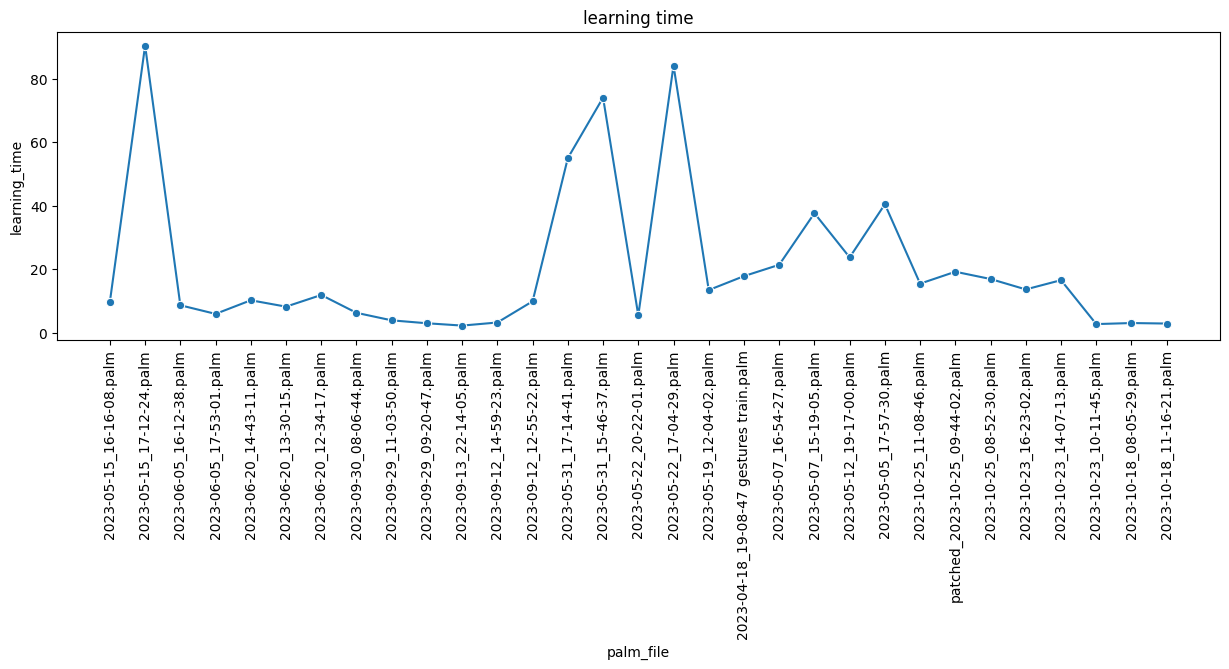

In [122]:
#set the canvas
plt.figure(figsize=(15, 4))

#plot the lineplot
sns.lineplot(data=model_results,
             x='palm_file',
             y='learning_time',
             markers=True,
             dashes=False,
             marker='o'
             ).set(title='learning time')

plt.xticks(rotation=90);

In [123]:
#learning time
print(f"max: {model_results['learning_time'].max()}, \n min: {model_results['learning_time'].min()}")

max: 90.39, 
 min: 2.19


find the average hyperparameter

In [124]:
import re

In [125]:
#separate the elements
model_results['prm_count'] = model_results['hyperparameters'].apply(lambda x: len(re.findall("'[^\'](.+?)[^\']'", x)))

#find the total number of elements
model_results['prm_count'].unique()

array([7, 6])

In [126]:
model_results['hyperparameters'][0]

"{'n_estimators': 125, 'max_depth': 20, 'min_samples_leaf': 5, 'criterion': 'entropy', 'max_features': 'sqrt'}"

In [127]:
#separate the elements
model_results['sep_prm'] = model_results['hyperparameters'].str.replace('{', '').str.replace('}', '').str.replace("'", '')

In [128]:
#check the content of the tag
print(model_results[(model_results['prm_count'] == 7)]['sep_prm'].iloc[0])

n_estimators: 125, max_depth: 20, min_samples_leaf: 5, criterion: entropy, max_features: sqrt


In [129]:
#separate the hyperparameters into specific elements
model_results['n_estimators'] = model_results.sep_prm.str.split(',').str[0]
model_results['max_depth'] = model_results.sep_prm.str.split(',').str[1]
model_results['min_samples_leaf'] = model_results.sep_prm.str.split(',').str[2]
model_results['criterion'] = model_results.sep_prm.str.split(',').str[3]
model_results['max_features'] = model_results.sep_prm.str.split(',').str[-1]

In [130]:
#separate the results
model_results['n_estimators_n'] = model_results['n_estimators'].apply(lambda x: int(re.search(': (...+?)', x).group(1)))
model_results['max_depth_n'] = model_results['max_depth'].apply(lambda x: int(re.search(': (..+?)', x).group(1)))
model_results['min_samples_leaf_n'] = model_results['min_samples_leaf'].apply(lambda x: int(re.search(': (.+?)', x).group(1)))
model_results['criterion_s'] = model_results['criterion'].apply(lambda x: x[(18-7):].replace(' ', ''))
model_results['max_features_s'] = model_results['max_features'].apply(lambda x: x[(18-4):])

find the mode value

In [132]:
model_results['n_estimators_n'].mode()

0    200
Name: n_estimators_n, dtype: int64

In [133]:
model_results['max_depth_n'].mode()

0    20
Name: max_depth_n, dtype: int64

In [134]:
model_results['min_samples_leaf_n'].mode()

0    3
Name: min_samples_leaf_n, dtype: int64

In [135]:
model_results['criterion_s'].mode()

0    entropy
Name: criterion_s, dtype: object

In [136]:
model_results['max_features_s'].mode()

0     sqrt
Name: max_features_s, dtype: object